<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/VDSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Very Deep Super-Resolution avec le Deep Learning

Description...

In [169]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import glob

# Téléchargement et chargement des données

Le nombre de données est très grand, le fichier contient 20 000 images et sa taille est d'environ 1,6 Go

In [ ]:
!wget "http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz"
!tar xzf iaprtc12.tgz

In [ ]:
!ls iaprtc12/images/ -l

Affichage d'une image aléatoire dans le répertoire /images/39/

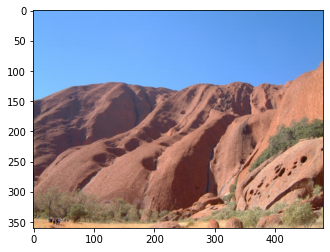

In [62]:
fichier = "iaprtc12/images/39/39"+str(int((random.randrange(0,1000))))+".jpg"
img=mpimg.imread(fichier)
plt.imshow(img)

In [ ]:
img

Chargement des images contenues dans le répertoire /images/39/

In [174]:
def ChargementImages(repertoire):
  images = []
  fichiers = glob.glob(repertoire+"*.jpg")
  for fichier in fichiers:
      img = mpimg.imread(fichier)
      images.append(img)
  return np.array(images)

In [ ]:
images = ChargementImages("iaprtc12/images/39/")

In [ ]:
images.shape

In [ ]:
print(images[0].shape)
images[0]

# Préparation des données d'entrainement

Chaque échantillon d'entrainement doit contenir :
 - X : Le canal de luminance de l'image basse résolution traitée par interpolation bicubique : Ybr
 - Y : L'image résiduelle : Yresiduelle = Yhr - Ybr (différence entre la luminance de l'image haute résolution et la luminance de l'image basse résolution traitée par interpolation bicubique)  